In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Laod data
with open('ultimate_data_challenge.json') as f:
    data=json.load(f)

# Data Wrangling

In [3]:
# Convert json into csv
df=pd.DataFrame(data)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
# Data cleaning 
df['avg_rating_of_driver'].fillna(np.mean(df['avg_rating_of_driver']),inplace=True)
df['avg_rating_by_driver'].fillna(np.mean(df['avg_rating_by_driver']),inplace=True)
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 12 columns):
city                      49604 non-null object
trips_in_first_30_days    49604 non-null int64
signup_date               49604 non-null object
avg_rating_of_driver      49604 non-null float64
avg_surge                 49604 non-null float64
last_trip_date            49604 non-null object
phone                     49604 non-null object
surge_pct                 49604 non-null float64
ultimate_black_user       49604 non-null bool
weekday_pct               49604 non-null float64
avg_dist                  49604 non-null float64
avg_rating_by_driver      49604 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [7]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [8]:
# Create target variable
active_list=[]
for i in df['trips_in_first_30_days']:
    if i>0:
        active_list.append(1)
    else:
        active_list.append(0)
df['active']=active_list

# Data Visualizations

Text(0.5, 1.0, 'Fraction of Retained Customer for the First Month')

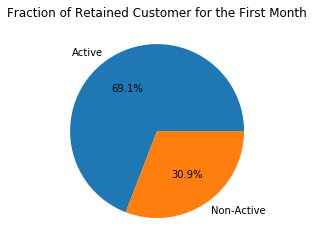

In [9]:
# Fraction of retained customer for the first month 
labels='Active','Non-Active'
size=[round(np.sum(df['active'])/len(df['active'])*100,2),round(100-((np.sum(df['active'])/len(df['active'])*100)),2)]
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title('Fraction of Retained Customer for the First Month')

Text(0, 0.5, 'Trips')

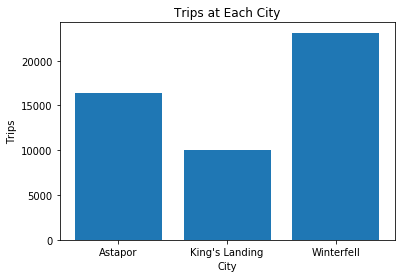

In [10]:
# Trips at Each City
city_trips=df[['city','trips_in_first_30_days']]
trip_at_each_city=city_trips.groupby(['city']).count()
plt.bar(x=trip_at_each_city.index,height=trip_at_each_city['trips_in_first_30_days'])
plt.title('Trips at Each City')
plt.xlabel('City')
plt.ylabel('Trips')

In [11]:
# Active VS Non-Active Clients at Each City
active_city=df[['city','active']]
active_city=active_city.groupby(['city']).sum()
city_and_active=trip_at_each_city.merge(active_city,on='city')
city_and_active['not_active']=city_and_active['trips_in_first_30_days']-city_and_active['active']
city_and_active

,trips_in_first_30_days,active,not_active
city,,,
Astapor,16413,11099,5314
King's Landing,10066,6556,3510
Winterfell,23125,16637,6488


Text(0, 0.5, 'Trips')

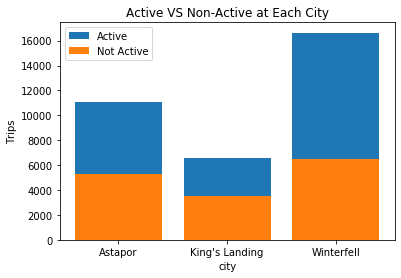

In [12]:
active_bar=plt.bar(x=city_and_active.index,height=city_and_active['active'])
not_active_bar=plt.bar(x=city_and_active.index,height=city_and_active['not_active'])
plt.legend((active_bar[0],not_active_bar[0]),('Active','Not Active'))
plt.title('Active VS Non-Active at Each City')
plt.xlabel('city')
plt.ylabel('Trips')

# Machine Learning

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from datetime import date
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Convert all non-numerical values to numercial values 
df['ultimate_black_user']*=1

In [15]:
df['signup_date'] =  pd.to_datetime(df['signup_date'] , infer_datetime_format=True)
df['last_trip_date'] =  pd.to_datetime(df['last_trip_date'] , infer_datetime_format=True)

In [16]:
df['delta_days']=(df['last_trip_date']-df['signup_date']).dt.days

In [17]:
y=df['active']
x=df.loc[:,df.columns!='active'].drop('trips_in_first_30_days',axis=1).drop('signup_date',axis=1).drop('last_trip_date',axis=1)
x=pd.get_dummies(x)

In [18]:
# Split data into trainning and testing set
xlr,xtestlr,ylr,ytestlr=train_test_split(x,y)

In [19]:
# Find feature of importances
dt=DecisionTreeClassifier()
dt.fit(xlr,ylr)

DecisionTreeClassifier()

In [20]:
fi_col=[]
fi=[]
for i,column in enumerate(x):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])
fi_df=zip(fi_col,fi) 
fi_df=pd.DataFrame(fi_df,columns=['features','feature importance'])

In [21]:
fi_df=fi_df.sort_values('feature importance',ascending=False).reset_index(drop=True)

Text(0, 0.5, 'Features')

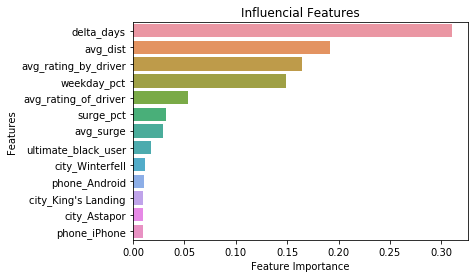

In [32]:
plot=sns.barplot(x='feature importance',y='features',data=fi_df)
plt.title('Influencial Features')
plt.xlabel('Feature Importance')
plt.ylabel('Features')

In [33]:
# Train and fit data into Decision Tree and find AUC score 
dt=DecisionTreeClassifier(random_state=0)
model=dt.fit(xlr,ylr)

In [34]:
yscore1=model.predict_proba(xtestlr)[:,1]
fpr1, tpr1, threshold1 = roc_curve(ytestlr, yscore1)
print('auc for Decision Tree: ', roc_auc_score(ytestlr, yscore1))

auc for Decision Tree:  0.7262553230840365


In [35]:
# Train and fit data into Logistic Regression and find AUC score 
lr=LogisticRegression(random_state=0)
lrmodel=lr.fit(xlr,ylr)
yscore2=lrmodel.predict_proba(xtestlr)[:,1]
fpr2, tpr2, threshold1 = roc_curve(ytestlr, yscore2)
print('auc for Logistic Regression: ', roc_auc_score(ytestlr, yscore2))

auc for Logistic Regression:  0.6388923361461103


C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
# Tune Logistic Regression and find the AUC score
log_param_grid=[
    {'C':[0.001,0.01,0.1,1,10,100]}    
]
log_grid=GridSearchCV(lr,param_grid=log_param_grid,cv=5,verbose=True)
best_log_param=log_grid.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver 

C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

In [37]:
best_log_param.best_estimator_

LogisticRegression(C=0.001, random_state=0)

In [38]:
best_lr=LogisticRegression(C=0.001, random_state=0)
best_lrmodel=best_lr.fit(xlr,ylr)
yscore4=best_lrmodel.predict_proba(xtestlr)[:,1]
fpr4, tpr4, threshold1 = roc_curve(ytestlr, yscore4)
print('auc for Tunned Logistic Regression: ', roc_auc_score(ytestlr, yscore4))

auc for Tunned Logistic Regression:  0.634237521673795


C:\Users\hantao\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
# Feed data into Random Forest and find AUC score
rf=RandomForestClassifier(random_state=0)
rfmodel=rf.fit(xlr,ylr)
yscore3=rfmodel.predict_proba(xtestlr)[:,1]
fpr3, tpr3, threshold1 = roc_curve(ytestlr, yscore3)
print('auc for Random Forest: ', roc_auc_score(ytestlr, yscore3))

auc for Random Forest:  0.8784216545293414


In [24]:
# Create random forest hyperparameter
rf_param={
    'max_depth':[10,20,30,40,50,60,70,80,90,100,None],
    'n_estimators':[200,400,600,800,1000,1200,1400,1600,1800,2000],
    'max_features':['auto','sqrt'],
    'min_samples_leaf':[1,2,4]
    
}

In [25]:
# Tunned random forest and find AUC score
search=RandomizedSearchCV(estimator=rf,param_distributions=rf_param,cv=5, n_jobs = -1)
best=search.fit(x,y)

In [27]:
best.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=800,
                       random_state=0)

In [29]:
best_rf2=RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=800,
                       random_state=0)
best_rfmodel2=best_rf2.fit(xlr,ylr)
yscore7=best_rfmodel2.predict_proba(xtestlr)[:,1]
fpr7, tpr7, threshold7 = roc_curve(ytestlr, yscore7)

In [30]:
print('auc for Tunned Random Forest: ', roc_auc_score(ytestlr, yscore7))

auc for Tunned Random Forest:  0.8917794937001502


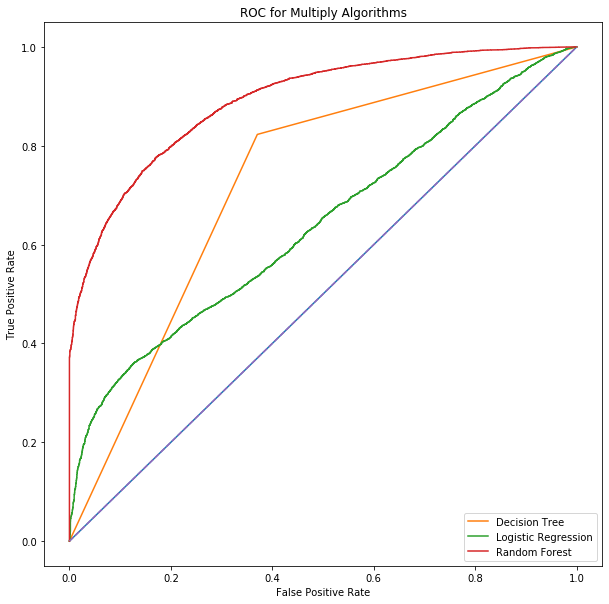

In [40]:
# Plot ROC for all 3 models
plt.figure(figsize=(10,10))
plt.plot([0,1],[0,1])
plt.title('ROC for Multiply Algorithms')
plt.plot(fpr1, tpr1,label='Decision Tree')
plt.plot(fpr2, tpr2,label='Logistic Regression')
plt.plot(fpr7, tpr7,label='Random Forest')
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()